In [412]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [413]:


# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [414]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

def changeCoordinates(point, movement):
    angle = - movement[2]
    x_translation = - movement[0]
    z_translation = - movement[1]
    Rxz = np.array([[np.cos(angle), 0, -np.sin(angle)],
                    [0, 1, 0],
                    [np.sin(angle), 0, np.cos(angle)]])

    # Apply the rotation matrix to point P
    point_rotated = np.dot(Rxz, point)

    # Translate the coordinates of P by x and z
    return point_rotated + np.array([x_translation, 0, z_translation])

def points_with_movement(x, z, movement):
    A = produce_cube_points(x, z)
    for i in range(len(A)):
        A[i] = changeCoordinates(A[i], movement)
    return A

In [415]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

# Change depending on movement !!
ROTATION = - np.pi / 9   # in radians
XMOVEMENT = - 0.0427171547           # in meters
ZMOVEMENT = 0.0567852171           # in meters

def move_points(points, movement):
    points_moved = []
    for point in points:
        points_moved.append(changeCoordinates(point, movement))
    return points_moved

movement = [XMOVEMENT, ZMOVEMENT, ROTATION]

points_doors_0 = [  
                    [0.57, 0.06, 0.002], [0.256, 0.056, 0.105], [0.555, -0.11, -0.15],
                    [-0.301, 0.309, 1.08], [-15., -0.21, 2.5], [-2.4, -0.343, 1.53], [0.002, 0.01, 7.6],
                    [-2.06, 0.54, -3.097], [-1.054, -0.265, -1.09], [-1.044, -0.2099, -3.06], [-2.109, 0.516, -1.15],
                    [-1.23, -1.002, -3.2], [-1.22, -1.53, -6.04], [-1.01, -1.02, -5.503], [-1.494, -1.295, -4.06],
                    [-3.12, -0.311, -0.111], [-4.32, -0.1001, -0.0302], [-1.52, 0.11, 0.102], [-3.11, -0.35, 0.13],
                    [-3.4, -3.3, -0.4], [-4.2, -2.1, -0.43], [-1.25, -1.1, 4.1], [-3.1, -2.452, 4.1],
                    [0.5, -0.35, 4.3], [-0.3, -0.35, 4.3], [-0.3, -1.252, 4.3], [0.5, -1.25, 4.3],
                    [0.89, 0.0, 1.25], [1.192, 0.0, 1.25], [1.19, -0.3, 1.25], [0.89, -0.2, 1.25],
                    [0.33, 0.0, 0.25], [0.4, 0.0, 0.25], [1.10, 0.3, 1.25], [0.80, -0.5, 1.5],
                    [0.5, 0.04, -7.], [1.2, 2.06, -6.], [1.10, 0.37, 1.], [0.80, -1.28, -1.5],
                    [0.1, 0.2, 0.0], [0.2, 0.3, 0.1], [1.10, 0.3, 1.25], [0.80, -0.5, 1.509],
                    [-0.31, 0.1, 0.25], [-2.055, 0.0, -0.25], [1.10, 0.306, -1.25], [-0.80, -0.5, 1.5],
                    [0.3, 0.003, 0.25], [0.4, 0.003, 0.25], [1.101, 0.304, 1.25], [0.803, -0.5, 1.5]
                ]

current = points_doors_0
points3D = []
for i in range(21):
    points3D.append(current)
    current = move_points(current, movement)

points3dOnCube = np.array(points3D)

points3dOnCube *= 100


20


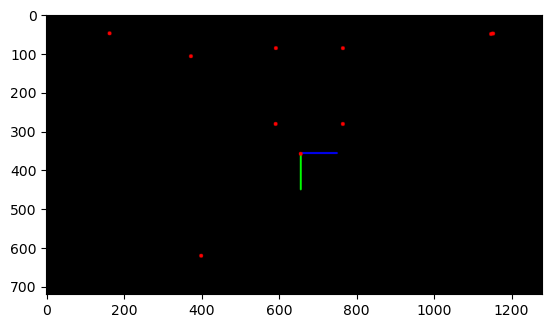

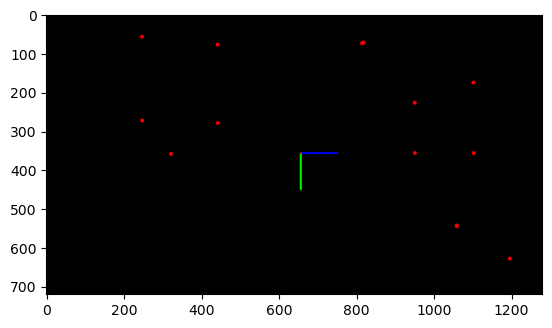

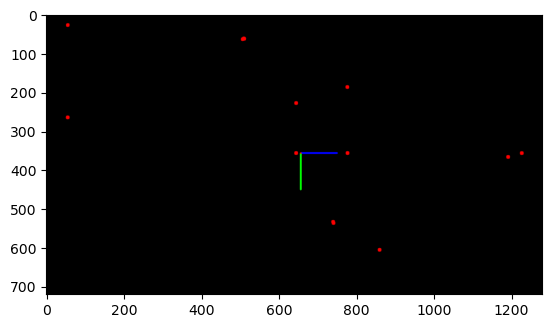

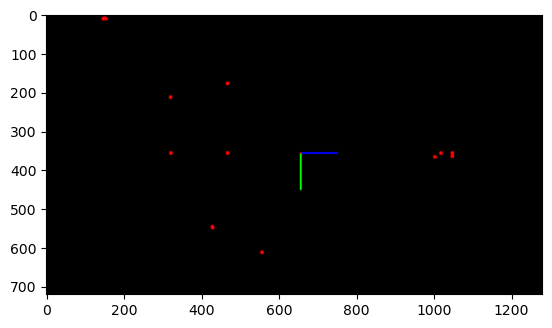

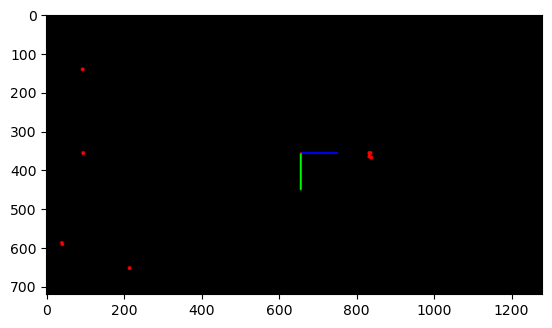

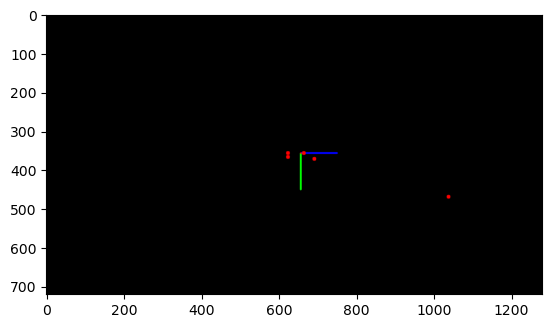

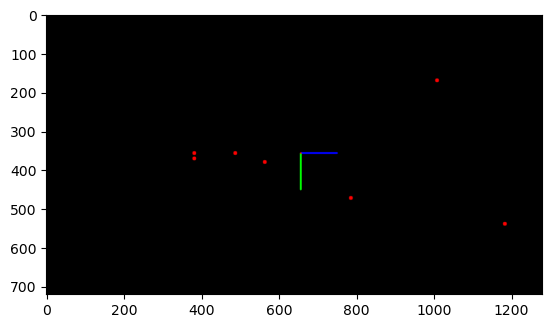

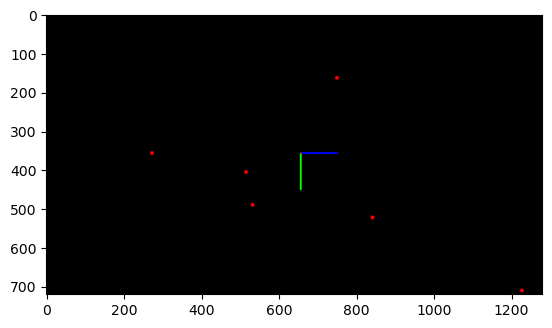

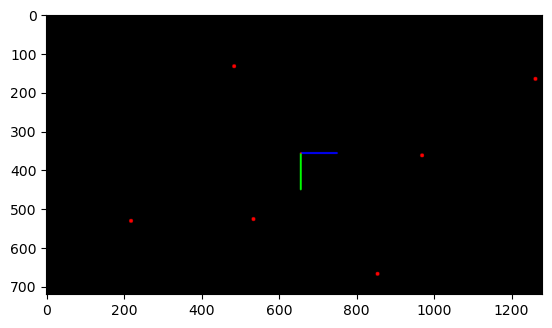

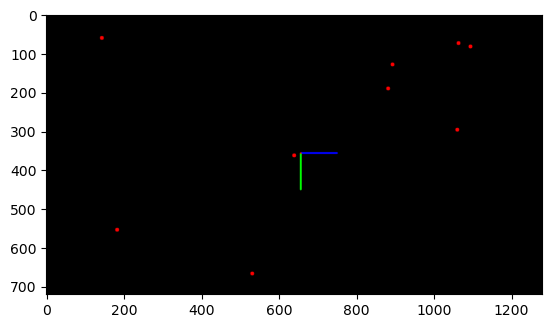

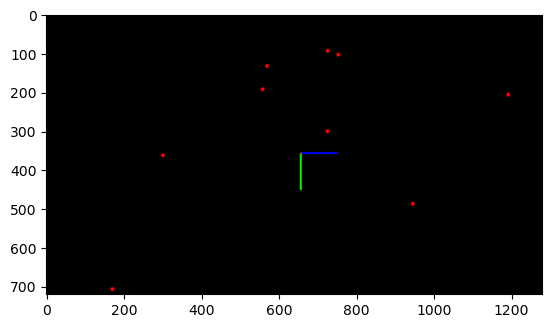

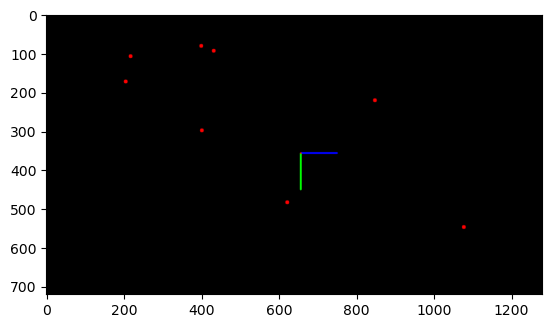

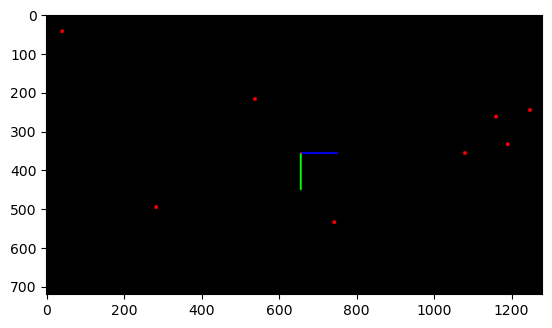

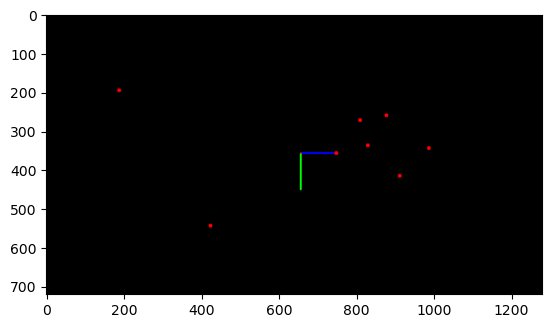

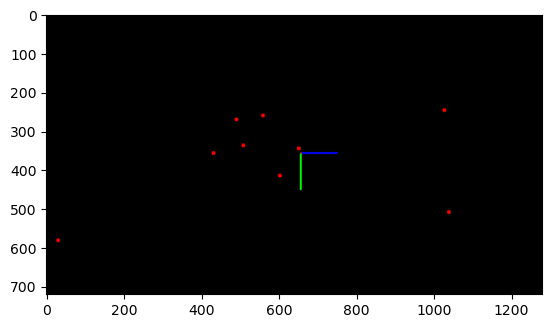

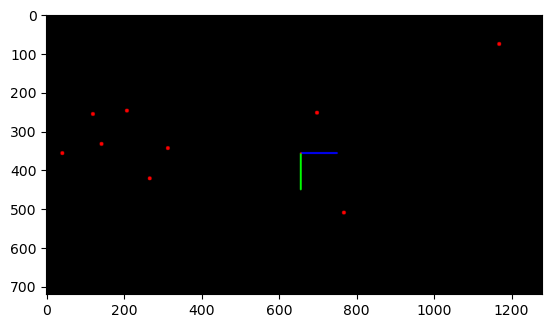

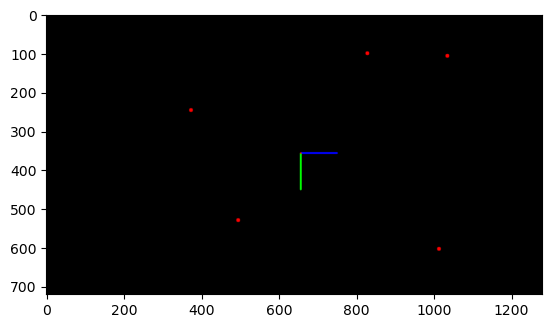

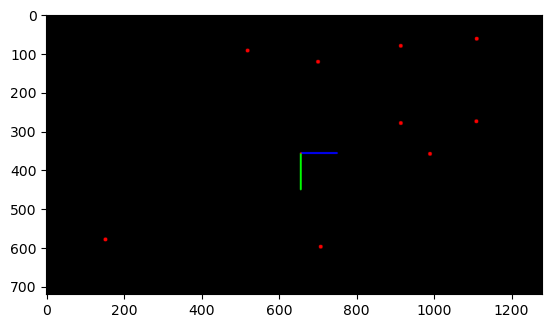

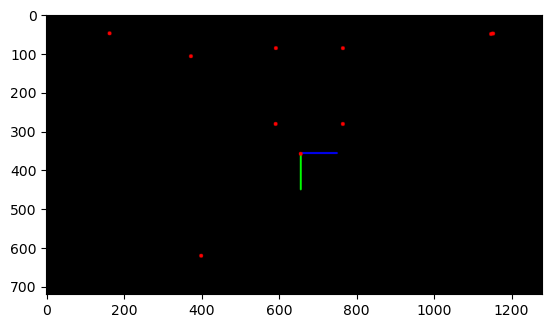

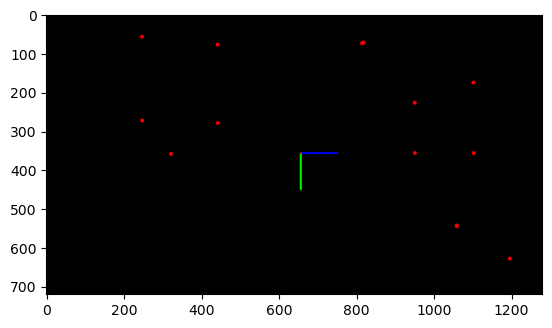

In [416]:
count = 0

all_drawed_points = []

for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        
        # img = cv2.imread(images_cube[i])
        # Create a black rectangle with the same size as the first image
        img = np.zeros_like(cv2.imread(images_cube[0]))

        # Draw a black rectangle with the same size as the first image
        cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 0), -1)
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        drawed_points = []
        j = 0
        for x, y in point_2d[:,0,:]:
            if points3dOnCube1[j][2] > 0 and x >= 0 and x <= 1280 and y >= 0 and y <= 720:
                drawed_points.append(points3dOnCube1[j])
                img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            j += 1

        all_drawed_points.append(drawed_points)

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1



In [417]:
# all_drawed_points = np.array(all_drawed_points)
# print(all_drawed_points.shape)

print("[", end="")
for i in range(len(all_drawed_points)):
    print("[", end="")
    for j in range(len(all_drawed_points[i])):
        print("[", end="")
        for k in range(3):
            print(all_drawed_points[i][j][k], end=", ")
        print("]", end=",")
    print("]", end=",\n")
print("]", end="\n")


[[[-30.099999999999998, 30.9, 108.0, ],[0.2, 1.0, 760.0, ],[-125.0, -110.00000000000001, 409.99999999999994, ],[50.0, -35.0, 430.0, ],[-30.0, -35.0, 430.0, ],[-30.0, -125.2, 430.0, ],[50.0, -125.0, 430.0, ],[80.0, -50.0, 150.0, ],[80.0, -50.0, 150.89999999999998, ],[-80.0, -50.0, 150.0, ],[80.30000000000001, -50.0, 150.0, ],],
[[-255.47565493335105, 1.0, 708.5562741159555, ],[-95.81231512074211, -35.0, 415.490312394224, ],[-170.98772478361477, -35.0, 388.12870092817053, ],[-170.98772478361477, -125.2, 388.12870092817053, ],[-95.81231512074211, -125.0, 415.490312394224, ],[45.15184080423726, 0.0, 142.22284864422306, ],[73.53055795197169, 0.0, 152.55185697265827, ],[73.34261942781451, -30.0, 152.48345294399311, ],[45.15184080423726, -20.0, 142.22284864422306, ],[64.88538584074136, 30.0, 149.40527165406212, ],[28.144103634022372, -50.0, 162.63698287393976, ],[73.43588942388308, 37.0, 125.9129561344144, ],[64.88538584074136, 30.0, 149.40527165406212, ],[27.836285505029274, -50.0, 163.48270